# 2/12/21 - First model G3575500 (LinKS 1906)

In [2]:
### libraries
%matplotlib inline
# set workspace path
from pyprojroot import here
workspace_path = str(here())#'/data/sknabel/autolens_workspace'
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

import matplotlib.pyplot as plt
from autoconf import conf
import autolens as al
import autolens.plot as aplt
import autofit as af
import pandas as pd
import numpy as np
from astropy.io import fits
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip
from os import path
import time

# paths
autoz_path = '/data/sknabel/autoz_lens_model/'
file_path = f'{autoz_path}files/'
csv_path = f'{file_path}csv/'
fits_path = f'{file_path}fits/'
png_path = f'{autoz_path}visuals/png/'
pdf_path = f'{autoz_path}visuals/pdf/'
object_folder = f'{fits_path}G3575500_1906/'

/data/sknabel/autoz_lens_model
Working Directory has been set to `/data/sknabel/autoz_lens_model`


/soft/anaconda3/lib/python3.7/site-packages/autoarray/dataset/abstract_dataset.py:90: RuntimeWarning: divide by zero encountered in true_divide
  return 1.0 / self.noise_map


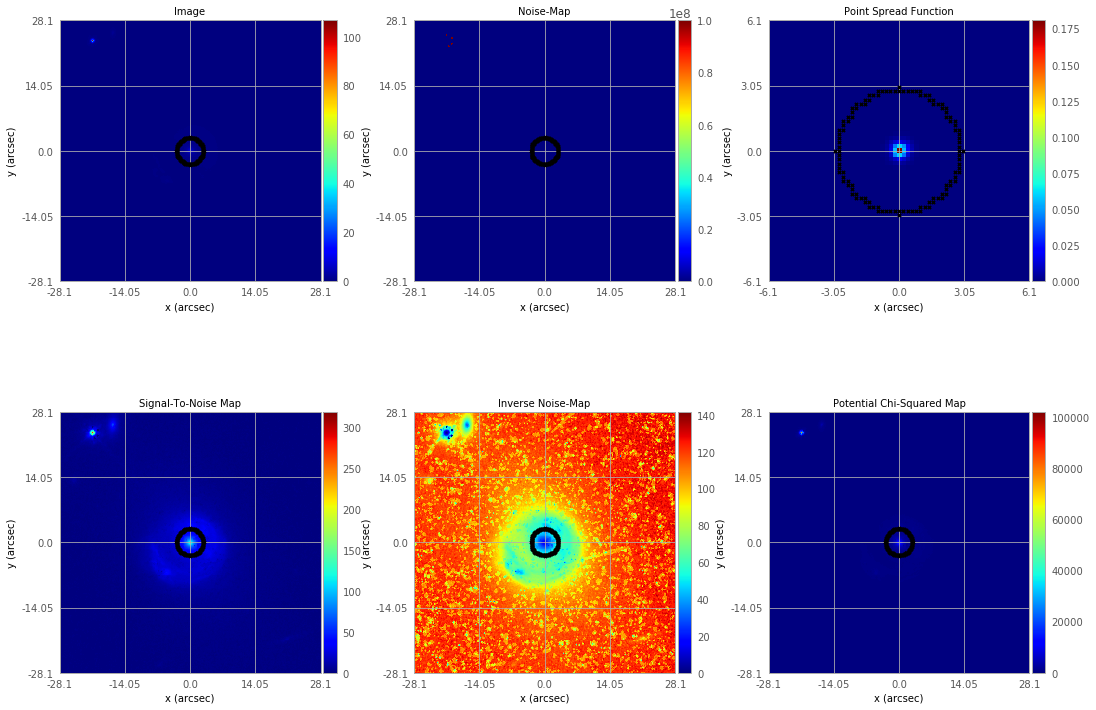

In [3]:
# trying with slacs for reference
slacs_folder='/data/sknabel/autolens_workspace/dataset/slacs/slacs1430+4105'
imaging = al.Imaging.from_fits(image_path=path.join(slacs_folder, 'image.fits'),
                              noise_map_path=path.join(slacs_folder, 'noise_map.fits'),
                              psf_path=path.join(slacs_folder, 'psf.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()

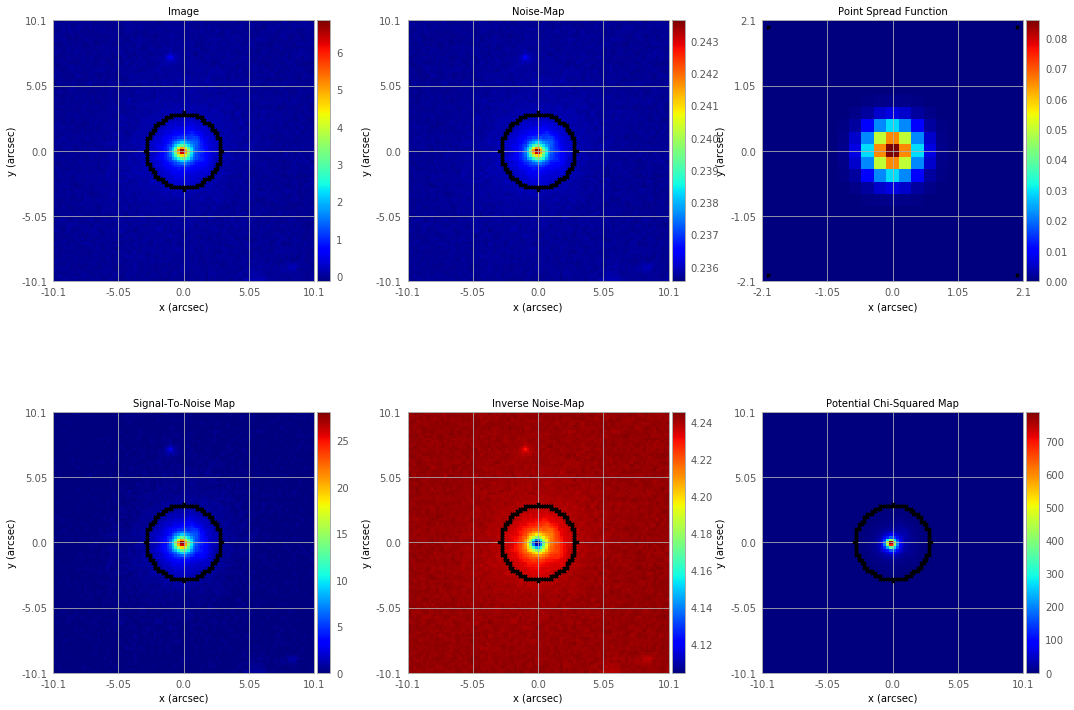

In [4]:
imaging = al.Imaging.from_fits(image_path=path.join(object_folder, '1906_r_image.fits'),
                              noise_map_path=path.join(object_folder, '1906_r_noisemap.fits'),
                              psf_path=path.join(object_folder, '1906_r_psf_resized.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()

In [5]:
# let's do the fit now
# set up grid
settings_masked_imaging = al.SettingsMaskedImaging(grid_class=al.Grid)#, psf_shape_2d=imaging.psf.shape_2d)

settings = al.SettingsPhaseImaging(settings_masked_imaging=settings_masked_imaging)

In [6]:
#set up lens and source - can I not use a source and just fit the lens?
lens = al.GalaxyModel(
    redshift=0.232537, bulge=al.lp.EllipticalSersic#, mass=al.mp.EllipticalIsothermal
)
#source = al.GalaxyModel(
#    redshift=0.365195, bulge=al.lp.SphericalExponential)

In [7]:
# set priors
# lens position
#lens.mass.centre_0 = af.UniformPrior(lower_limit=-1, upper_limit=1)
#lens.mass.centre_1 = af.UniformPrior(lower_limit=-1, upper_limit=1)
lens.bulge.centre_0 = af.UniformPrior(lower_limit=-1, upper_limit=1)
lens.bulge.centre_1 = af.UniformPrior(lower_limit=-1, upper_limit=1)
# einstein radius
#lens.mass.einstein_radius = af.GaussianPrior(mean=1.0, sigma=0.3)
# effective radius
lens.bulge.effective_radius = af.UniformPrior(lower_limit=0.0, upper_limit=3.0)
# source position
#source.bulge.centre_0 = af.UniformPrior(lower_limit=-1, upper_limit=1)
#source.bulge.centre_1 = af.UniformPrior(lower_limit=-1, upper_limit=1)
#source.bulge.effective_radius = af.UniformPrior(lower_limit=0.0, upper_limit=1.0)

In [8]:
# set up phase
phase = al.PhaseImaging(
    search=af.DynestyStatic(
        path_prefix="G3575500", name="r_light_fit", n_live_points=80
    ),
    settings=settings,
    galaxies=af.CollectionPriorModel(lens=lens)#, source=source)
)

In [9]:
# run phase
# run the phase
print('Phase running...')
tick = time.perf_counter()
phase_result = phase.run(dataset=imaging, mask=mask)
tock = time.perf_counter()
print(f'Work complete! Took us {tock-tick} seconds or {(tock-tick)/60} minutes.')

Phase running...


INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.
INFO:root:No Dynesty samples found, beginning new non-linear search. 
295it [00:12, 22.72it/s, +80 | bound: 0 | nc: 1 | ncall: 2660 | eff(%): 14.098 | loglstar:   -inf < -229.454 <    inf | logz: -238.206 +/-    nan | dlogz:  1.099 >  0.089]   
INFO:root:2500 Iterations: Performing update (Visualization, outputting samples, etc.).
297it [00:00, 2142.09it/s, bound: 0 | nc: 23 | ncall: 2687 | eff(%): 11.053 | loglstar:   -inf < -5116.791 <    inf | logz: -5125.556 +/-    nan | dlogz: 4919.594 >  0.089]/soft/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
362it [00:04, 51.76it/s, bound: 7 | nc: 9 | ncall: 3483 | eff(%): 10.393 | loglstar:   -inf < -4000.555 <    inf | logz: -4010.096 +/-    nan | dlogz

Work complete! Took us 139.3508960455656 seconds or 2.32251493409276 minutes.


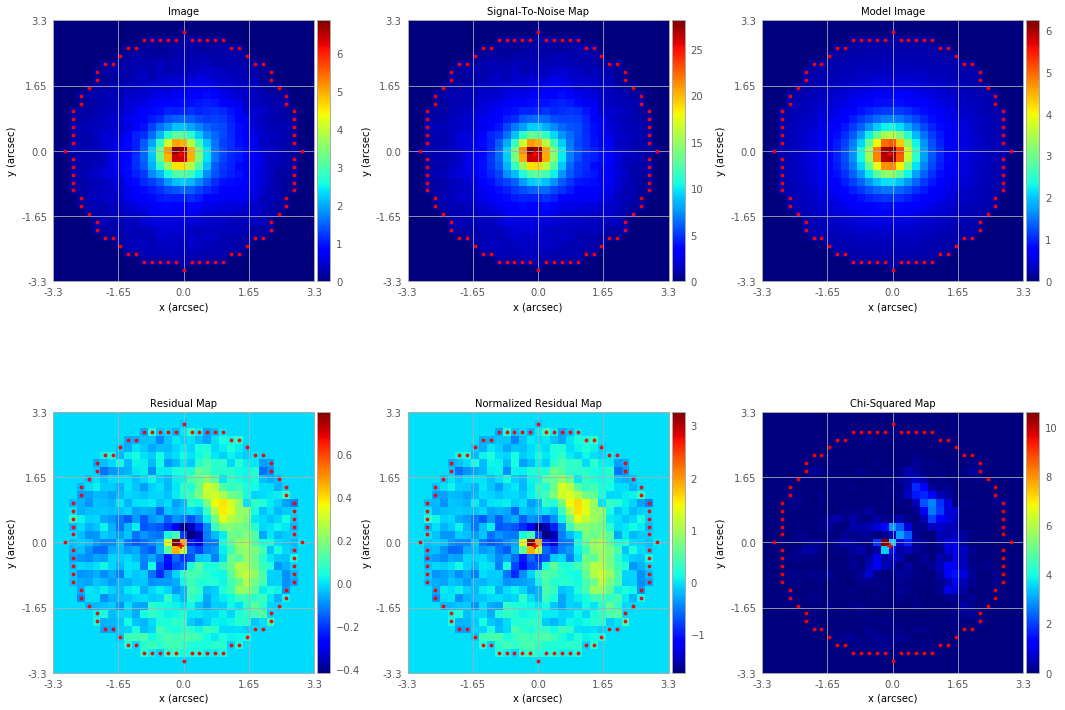

In [10]:
# plot it!
fit_imaging_plotter = aplt.FitImagingPlotter(fit=phase_result.max_log_likelihood_fit)
fit_imaging_plotter.subplot_fit_imaging()

# Now we see if we can get it to run to the g-band as priors.

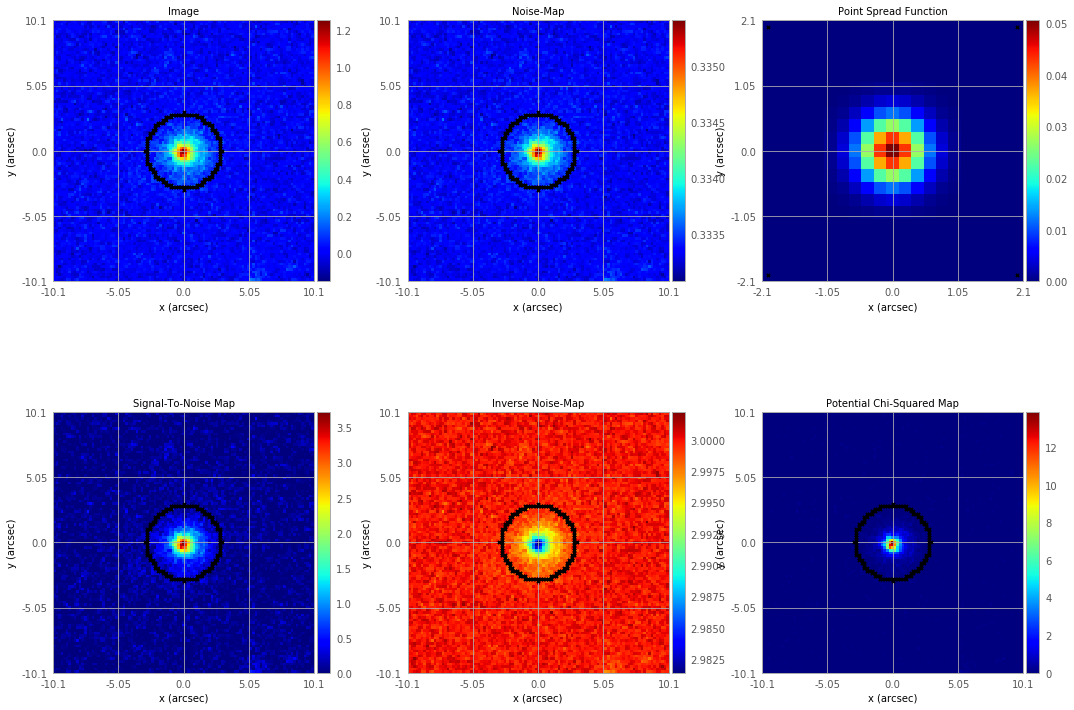

In [36]:
imaging = al.Imaging.from_fits(image_path=path.join(object_folder, '1906_g_image.fits'),
                              noise_map_path=path.join(object_folder, '1906_g_noisemap.fits'),
                              psf_path=path.join(object_folder, '1906_g_psf_resized.fits'),
                               pixel_scales=0.2)
mask = al.Mask2D.circular(
    shape_2d=imaging.shape_2d, pixel_scales=imaging.pixel_scales, sub_size=1, radius=3.0
)
visuals_2d = aplt.Visuals2D(mask=mask)

imaging_plotter = aplt.ImagingPlotter( # this is where the noise is coming up weird
    imaging=imaging, visuals_2d=aplt.Visuals2D(mask=mask)
)
imaging_plotter.subplot_imaging()

In [37]:
# let's do the fit now
# set up grid
settings_masked_imaging = al.SettingsMaskedImaging(grid_class=al.Grid)#, psf_shape_2d=imaging.psf.shape_2d)

settings = al.SettingsPhaseImaging(settings_masked_imaging=settings_masked_imaging)

In [38]:
#set up lens and source

lens_light = phase_result.model.galaxies.lens.bulge
print(lens_light)

lens = al.GalaxyModel(
    redshift=0.232537, bulge=lens_light, mass=al.mp.EllipticalIsothermal
)

source = al.GalaxyModel(
    redshift=0.365195, bulge=al.lp.SphericalExponential)

# make mass trace same ellipticity as light profile
lens.mass.centre_0 = af.GaussianPrior(mean=lens_light.centre_0.mean, sigma=lens_light.centre_0.sigma)
lens.mass.centre_1 = af.GaussianPrior(mean=lens_light.centre_1.mean, sigma=lens_light.centre_1.sigma)
lens.mass.elliptical_comps = lens.bulge.elliptical_comps

# einstein radius
lens.mass.einstein_radius = af.GaussianPrior(mean=1.0, sigma=0.3)
# source position
source.bulge.centre_0 = af.UniformPrior(lower_limit=-3, upper_limit=3)
source.bulge.centre_1 = af.UniformPrior(lower_limit=-3, upper_limit=3)
source.bulge.effective_radius = af.UniformPrior(lower_limit=0.0, upper_limit=3.0)

EllipticalSersic (centre_0, GaussianPrior, mean = -0.08760654579061176, sigma = 0.05), (centre_1, GaussianPrior, mean = -0.07736193342589211, sigma = 0.05), (elliptical_comps_0, GaussianPrior, mean = 0.026856593744287303, sigma = 0.2), (elliptical_comps_1, GaussianPrior, mean = 0.04968736662939068, sigma = 0.2), (intensity, GaussianPrior, mean = 0.1, sigma = 0.1), (effective_radius, GaussianPrior, mean = 2.92320268638392, sigma = 2.92320268638392), (sersic_index, GaussianPrior, mean = 3.5608665534637236, sigma = 1.5)


In [39]:
# set up phase
phase2 = al.PhaseImaging(
    search=af.DynestyStatic(
        path_prefix="G3575500", name="g_fit_021821", n_live_points=80
    ),
    settings=settings,
    galaxies=af.CollectionPriorModel(lens=lens, source=source)#, source=source)
)

In [40]:
# run phase
# run the phase
print('Phase running...')
tick = time.perf_counter()
phase_result = phase2.run(dataset=imaging, mask=mask)
tock = time.perf_counter()
print(f'Work complete! Took us {tock-tick} seconds or {(tock-tick)/60} minutes.')

INFO:root:Generating initial samples of model, which are subject to prior limits and other constraints.


Phase running...


/soft/anaconda3/lib/python3.7/site-packages/dynesty/dynesty.py:373: UserWarning: A note of caution: having `nlive < ndim * (ndim + 1) // 2` may result in unconstrained bounding distributions.
  warnings.warn("A note of caution: "
INFO:root:No Dynesty samples found, beginning new non-linear search. 
243it [00:25,  2.25it/s, bound: 0 | nc: 54 | ncall: 2437 | eff(%):  9.971 | loglstar:   -inf < 88.111 <    inf | logz: 82.446 +/-  0.352 | dlogz: 30.209 >  0.089]         /soft/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
257it [00:26,  9.59it/s, bound: 2 | nc: 8 | ncall: 2536 | eff(%): 10.134 | loglstar:   -inf < 92.384 <    inf | logz: 85.808 +/-  0.359 | dlogz: 27.774 >  0.089] /soft/anaconda3/lib/python3.7/site-packages/dynesty/sampling.py:216: UserWarning: Random number generation appears to be extr

Work complete! Took us 136.55510130524635 seconds or 2.2759183550874393 minutes.


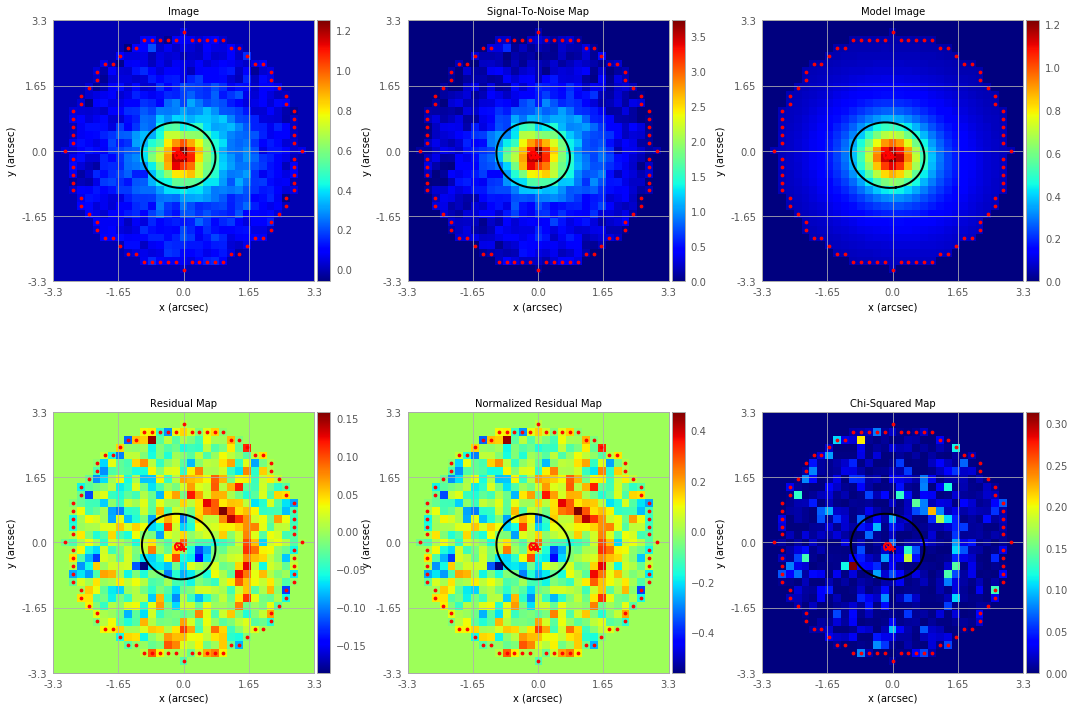

In [41]:
# plot it!
fit_imaging_plotter = aplt.FitImagingPlotter(fit=phase_result.max_log_likelihood_fit)
fit_imaging_plotter.subplot_fit_imaging()